In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1: Load the data
df = pd.read_csv('medical_examination.csv')

# 2: Add 'overweight' column
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)

# 3: Normalize 'cholesterol' and 'gluc'
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)  # Normal: 0, Abnormal: 1
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)  # Normal: 0, Abnormal: 1

In [7]:
# 4: Function to draw the categorical plot
def draw_cat_plot():
    # 5: Melting the data to long format for categorical plotting
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    # 6: Creating the categorical plot using sns.catplot
    cat_plot = sns.catplot(data=df_cat, x="variable", hue="value", col="cardio", kind="count")

    # 7: Store the figure
    fig = cat_plot.fig

    # 8: Save the figure to a file
    fig.savefig('catplot.png')

    # 9: Displaying the figure (this will show only the catplot at this stage)
    plt.show()

    return fig

In [8]:
# 10: Function to draw the heatmap
def draw_heat_map():
    # 11: Clean the data for heatmap (filter out invalid data)
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &                    # Diastolic pressure should be less than or equal to systolic
        (df['height'] >= df['height'].quantile(0.025)) &  # Height should be within 2.5th and 97.5th percentile
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &  # Weight should be within 2.5th and 97.5th percentile
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12: Calculate the correlation matrix
    corr = df_heat.corr()

    # 13: Generate a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14: Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # 15: Plot the heatmap
    sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", mask=mask, ax=ax)

    # 16: Save the heatmap figure to a file
    fig.savefig('heatmap.png')

    # 17: Display the heatmap (this will display only the heatmap at this stage)
    plt.show()

    return fig

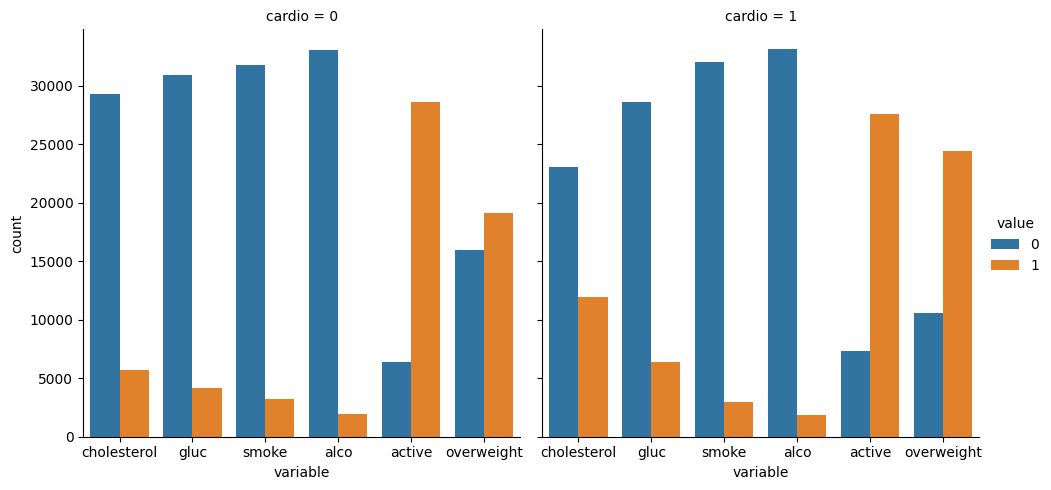

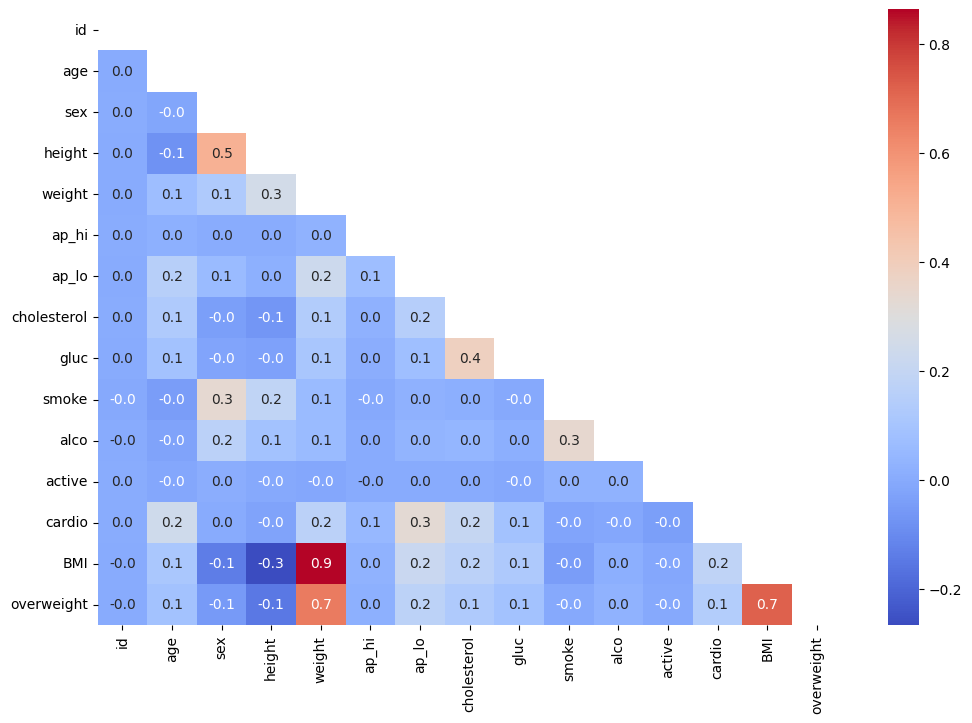

In [9]:
# Call the functions to generate the plots
cat_fig = draw_cat_plot()
heatmap_fig = draw_heat_map()